# Pixel location of points

When dealing with point data in a shapefile, you may want to find the relative pixel locations of the points to the overall raster files. This can be done using `ogr` and the `gdal` library

In [4]:
from osgeo import gdal,ogr
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [5]:
shp = '/efs/data/2018-02-27/settlements/doro/shapefiles/structures.shp'
raster = '/efs/data/2018-02-27/settlements/doro/rasterfiles/doro.tif'

## Initial overview

First, gain an overview of the shapefile information. A fast, visually appealing way to do this is to use `geopandas`

In [6]:
gdf = gpd.read_file(shp)

In [7]:
gdf.head()

,Site_ID,Sensor_ID,Sensor_Dat,Confidence,Field_Vali,CampStatus,CampName,Notes,EventCode,CampType,CampTrend,Shelter_St,ShelterClo,Structure_,geometry
0,Tent Shelter,Worldview-2,2013-12-14,Medium,Not yet field validated,Open (Operational),Doro,None,OT20130511SSD,IDP Camp,Increase,Open,None,Tent Shelter,POINT (33.77215777000004 9.991844241000081)
1,Tent Shelter,Worldview-2,2013-12-14,Medium,Not yet field validated,Open (Operational),Doro,None,OT20130511SSD,IDP Camp,Increase,Open,None,Tent Shelter,POINT (33.77183654300006 9.991680059000089)
2,Tent Shelter,Worldview-2,2013-12-14,Medium,Not yet field validated,Open (Operational),Doro,None,OT20130511SSD,IDP Camp,Increase,Open,None,Tent Shelter,POINT (33.77175088200005 9.991615813000067)
3,Tent Shelter,Worldview-2,2013-12-14,Medium,Not yet field validated,Open (Operational),Doro,None,OT20130511SSD,IDP Camp,Increase,Open,None,Tent Shelter,POINT (33.77142251700008 9.991722889000073)
4,Tent Shelter,Worldview-2,2013-12-14,Medium,Not yet field validated,Open (Operational),Doro,None,OT20130511SSD,IDP Camp,Increase,Open,None,Tent Shelter,POINT (33.77105845900007 9.992633033000061)


## Extract information

In [8]:
src_ds = gdal.Open(raster) # open raster file

In [9]:
gt = src_ds.GetGeoTransform() # get tranforms

**Note:** Below method works when there are no rotational transformations

In [10]:
if gt[2] != 0 or gt[4] != 0:
    raise Exception('Warning the image has been rotated')

In [11]:
ds = ogr.Open(shp) # open shapefile

In [12]:
lyr = ds.GetLayer() # get the layer (here only 1)

Loop through the different features (points) in the file and extract their pixel mapped locatation relative to the geometry of the associated raster file

In [13]:
lsx=[]
lsy=[]
# here we get shelter type
shelter = []
for feat in lyr:
    geom = feat.GetGeometryRef() # get geo-referenced location
    mx, my = geom.GetX(), geom.GetY() # get overall pixel mapped geometry of raster file
    px = int((mx - gt[0]) / gt[1]) # get x mapped pixel value
    py = int((my - gt[3]) / gt[5]) # get y mapped pixel value
    x = float(px) # convert to float
    y = float(py)
    lsx.append(x)
    lsy.append(y)
    shelter_type = feat.GetField(13) # the shelter type field is the 13 field (see geopandas array above)
    shelter.append(shelter_type)

Plot the values to make sure they make visual sense

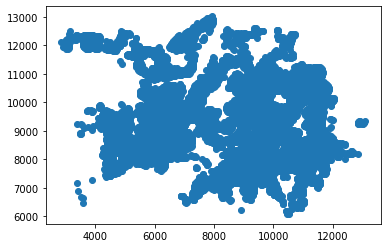

In [15]:
plt.scatter(lsx, lsy)
plt.show()

If tiling the raster file, the tile mapped coordinates of the features can be easily computed from this mapping